# Guided Project: Predicting Employee Productivity Using Tree Models

For this project, we'll be introducing the dataset Dataset - Productivity Prediction of Garment Employees, which originaly from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees)

Below is the summary of the dataset description:
>   The garment industry is one of the key examples of the industrial globalization of the modern era.

>    It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.

>    So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.


## Dataset

In [1]:
import pandas as pd
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### Columns' Information

- `date`: date in MM-DD-YYYY
- `quarter`: a portion of the month — month was divided into four quarters
- `department`: associated department with the instance
- `day`: day of the week
- `team`: associated team number with the instance
- `targeted_productivity`: targeted productivity set by the authority for each team for each day
- `smv`: standard minute value — the allocated time for a task
- `wip`: work in progress — includes the number of unfinished items for products
- `over_time`: represents the amount of overtime by each team in minutes
- `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
- `idle_time`: the duration of time when the production was interrupted due to several reasons
- `idle_men`: the number of workers who were idle due to production interruption
- `no_of_style_change`: number of changes in the style of a particular product
- `no_of_workers`: number of workers on each team
- `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

### Data Review

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

- We have 4 columns as `object` type, and the rest 10 columns are numeric
- `wip` column has missing value

In [3]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


### Unique Values

In [4]:
# check number of unique value for each column
for i in df.columns:
    uni_val = df[i].value_counts().count()
    print(f'Column "{i}" has {uni_val} unique value')

Column "date" has 59 unique value
Column "quarter" has 5 unique value
Column "department" has 3 unique value
Column "day" has 6 unique value
Column "team" has 12 unique value
Column "targeted_productivity" has 9 unique value
Column "smv" has 70 unique value
Column "wip" has 548 unique value
Column "over_time" has 143 unique value
Column "incentive" has 48 unique value
Column "idle_time" has 12 unique value
Column "idle_men" has 10 unique value
Column "no_of_style_change" has 3 unique value
Column "no_of_workers" has 61 unique value
Column "actual_productivity" has 879 unique value


In [5]:
# we'll print out the value counts for the columns that have unique value less than 12
col = ['quarter', 'department', 'day', 'team', 'targeted_productivity',
       'idle_time', 'idle_men', 'no_of_style_change']

for i in col:
    print(f'Column "{i}":')
    print(df[i].value_counts())
    print('\n')

Column "quarter":
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64


Column "department":
sweing        691
finishing     257
finishing     249
Name: department, dtype: int64


Column "day":
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64


Column "team":
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64


Column "targeted_productivity":
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64


Column "idle_time":
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64


Column "idle_men":
0     1179
10       3
15       3
30  

- `quarter` - there is a suspecious value `Quarter5`
- `department` - two unique values are the same `finishing`, probably format issue
- `day` - there is no `Friday`, but we have no missing value for this column, so probably the factory is closed on Fridays
- `team` - nothing special
- `targeted_productivity` - the value is set in advance, so not suprise to see only few unique value for float number, but we'll need to compare this with the `actual_productivity` to see the performance
- `idle_time` - we have 1179 count for 0 value, which mean the factory rarely suffers from interruptions
- `idle_men` - we have the same count as above for 0 value, so both matched the idle time.
- `no_of_style_change`- In most cases, we have no changes in the style of a particular product, and the maximum number of change is 2 times, with 33 observations only.

Rest of the columns have many unique values, so we need to review case by case

`date` column

In [6]:
df["date"]

0        1/1/2015
1        1/1/2015
2        1/1/2015
3        1/1/2015
4        1/1/2015
          ...    
1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, Length: 1197, dtype: object

In [7]:
df["date"].sample(10, random_state = 99)

1003     3/1/2015
463     1/27/2015
742     2/12/2015
356     1/21/2015
776     2/15/2015
819     2/17/2015
167     1/10/2015
828     2/18/2015
1152    3/10/2015
319     1/19/2015
Name: date, dtype: object

- The date is with American format and the range is from 1st of Jan to 11th of Mar within 2015

`smv` column

In [8]:
import numpy as np
per = [0, 25, 50, 75, 100]
per_val = np.percentile(df['smv'], per)

per_val[-1] += 1e-2 # add a tiny valye to the last to ensure the last range includes the max value

for i, j in zip(per_val, per_val[1:]):
    count = df[(df['smv'] >= i) & (df['smv'] < j)].shape[0]
    print(f'range {i} to {j}: {count}')

range 2.9 to 3.94: 128
range 3.94 to 15.26: 461
range 15.26 to 24.26: 308
range 24.26 to 54.57: 300


- Only a few observations can complete within the time allocated for the 25th percentile

`wip` column

In [9]:
per = [0, 25, 50, 75, 100]
exl_null = df[df["wip"].notnull()] # not null only
per_val = np.percentile(exl_null["wip"], per)

per_val[-1] += 1e-2 # add a tiny valye to the last to ensure the last range includes the max value

for i, j in zip(per_val, per_val[1:]):
    count = exl_null[(exl_null["wip"] >= i) & (exl_null["wip"] < j)].shape[0]
    print(f'range {i} to {j}: {count}')
    
print(f'null value count: {df[df["wip"].isnull()].shape[0]}')

range 7.0 to 774.5: 173
range 774.5 to 1039.0: 168
range 1039.0 to 1252.5: 177
range 1252.5 to 23122.01: 173
null value count: 506


- It's kinda uniform accross each group of percentile, while close to half of the observations are `Null`, but we dont know if this mean no finished item or just missing value

`over_time` column

In [10]:
# considering value == 0
col = df['over_time']
min_nonzero = col[col > 0].min()

val_list = [min_nonzero]
extra_per = [25, 50, 75, 100]
val_list.extend(np.percentile(df['over_time'], extra_per))

val_list[-1] += 1e-2 # add a tiny valye to the last to ensure the last range includes the max value

print(f'value == 0: {col[col==0].count()}')

for i, j in zip(val_list, val_list[1:]):
    count = df[(df['over_time'] >= i) & (df['over_time'] < j)].shape[0]
    print(f'range {i} to {j}: {count}')

value == 0: 31
range 120 to 1440.0: 223
range 1440.0 to 3960.0: 327
range 3960.0 to 6960.0: 316
range 6960.0 to 25920.01: 300


- Only few cases we dont need over time, the serious point is 25th percentile is a full day and the maximum is a week.

`incentive` column

In [11]:
# considering value == 0
col = df['incentive']
min_nonzero = col[col > 0].min()

val_list = [min_nonzero]

# this column kinda left-skewed, so we'll try with different percentile list
extra_per = [90, 95, 99, 100]
val_list.extend(np.percentile(df['incentive'], extra_per))

val_list[-1] += 1e-3 # add a tiny valye to the last to ensure the last range includes the max value

print(f'value = 0: {col[col==0].count()}')

for i, j in zip(val_list, val_list[1:]):
    count = df[(df['incentive'] >= i) & (df['incentive'] < j)].shape[0]
    print(f'range {i} to {j}: {count}')

value = 0: 604
range 21 to 63.0: 414
range 63.0 to 88.0: 110
range 88.0 to 119.0: 56
range 119.0 to 3600.001: 13


- Workers barely have incentives, more than half of the observations have no incentive and the 99th percentile is 119 BDT

`no_of_workers` column

In [12]:
per = [0, 25, 50, 75, 100]
per_val = np.percentile(df['no_of_workers'], per)

per_val[-1] += 1e-3 # add a tiny valye to the last to ensure the last range includes the max value

for i, j in zip(per_val, per_val[1:]):
    count = df[(df['no_of_workers'] >= i) & (df['no_of_workers'] < j)].shape[0]
    print(f'range {i} to {j}: {count}')

range 2.0 to 9.0: 276
range 9.0 to 34.0: 296
range 34.0 to 57.0: 268
range 57.0 to 89.001: 357


- Around 30% of observations need much workers

`actual_productivity` column

In [13]:
per = [0, 25, 50, 75, 100]
per_val = np.percentile(df['actual_productivity'], per)

per_val[-1] += 1e-2 # add a tiny valye to the last to ensure the last range includes the max value

for i, j in zip(per_val, per_val[1:]):
    count = df[(df['actual_productivity'] >= i) & (df['actual_productivity'] < j)].shape[0]
    print(f'range {i} to {j}: {count}')

range 0.233705476 to 0.650307143: 299
range 0.650307143 to 0.773333333: 299
range 0.773333333 to 0.850252525: 299
range 0.850252525 to 1.1304375: 300


- This is a perfect uniform distribution! Either really a coincident or there is a special rule for the scoring?
- Also, the values have many decimal places
- Besides, we can see that last range has value higher than 1, but the description indicating that 1 was the maximum possible value.

### Relevant Columns

Next, we'll be comparing the relevant columns

`actual_productivity` vs `targeted_productivity`

In [14]:
better = df[df['actual_productivity'] > df['targeted_productivity']].shape[0]
worse = df[df['actual_productivity'] < df['targeted_productivity']].shape[0]
same = df[df['actual_productivity'] == df['targeted_productivity']].shape[0]

print(f'Better Performance: {better}')
print(f'Worce Performance: {worse}')
print(f'Performance as expected: {same}')

Better Performance: 869
Worce Performance: 322
Performance as expected: 6


Most of the observations have better performance, brilliant! And only a few are exactly the same.

`idle_time` vs `idle_men`

In [15]:
df[(df["idle_time"] > 0) & (df["idle_men"] == 0)].shape[0]

0

In [16]:
df[(df["idle_time"] == 0) & (df["idle_men"] > 0)].shape[0]

0

Make sence, there is no idle worker during the production was interrupted, nor having idle worker when the production is fine

## Data Cleansing

### Suspecious Data

There is `Quarter5` in the `quarter` column, this make sence if they just group them with 7 days per quarter. But, since there is only less observations compared to other group, and corresponds to only 2 date, we'll merge them with `Quarter4`

In [17]:
df.loc[df['quarter'] == 'Quarter5', 'date'].value_counts()

1/31/2015    24
1/29/2015    20
Name: date, dtype: int64

In [18]:
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

There is extra space in one of the value, making them treated as different unique value, we'll merge them.

In [19]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [20]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df["department"].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

While the dataset description mentioned that the `actual_productivity` column ranges from 0 to 1, but we have value >1 in the column. We can do a proportional calculation by dividing the value with the maximum value of the column. However, we dont know if the value of the full column has issue of just those exceed 1, so we'll just convert them to 1.

In [21]:
df["actual_productivity"].max()

1.1204375

In [22]:
df.loc[df["actual_productivity"] > 1, "actual_productivity"] = 1
df["actual_productivity"][df["actual_productivity"] > 0.99].value_counts()

1.000000    37
0.999995     3
0.991389     1
0.997792     1
0.994271     1
0.994850     1
0.999924     1
0.994375     1
0.991800     1
0.999533     1
Name: actual_productivity, dtype: int64

### Target Variable (y)

As our topic stated "Productivity Prediction", so our target variable should be about the productivity. Althout we have the `actual_productivity` that we can use directly, but different task or item may required different score, as we can see from the `targeted_productivity`

Thus, we'll be creating one more column called `productive`, indicates whether the productivity targets were achieved, and this will be our target vaeiable `y`

In [23]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df["productive"].value_counts()

True     875
False    322
Name: productive, dtype: int64

### Removing unnecessary columns

Moving on, we'll be considering the below columns to be removed:
- `date`: it has only three month period, which exact date is meaningless for the performace, especially we have the `quarter` column which indicates the week of the month
- `idle_time` & `idle_men`: there are only 18 observations with non-zero values which barely add any information
- `wip`: there are too many empty observations, and we can't tell if an empty cell means no unfinished item or just missing information
- `no_of_style_change`: there are only few non-zero values
- `actual_productivity`: which we had converted to `productive`

    We're not removing `targeted_productivity` because the score set in advance might be meaningful whether it's set too high or something else.

In [24]:
df = df.drop(["date", "idle_time", "idle_men", "wip", "no_of_style_change", "actual_productivity"], axis = 1)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,productive
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,True
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,True
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,True
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,True
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,True


### Modifying

It's unnecessary to keep the words `quarter` for every value, so we'll just remain the integers.

In [25]:
df['quarter'] = df['quarter'].astype(str).str[-1]
df["quarter"] = df["quarter"].astype("int")

df["quarter"].value_counts()

1    360
2    335
4    292
3    210
Name: quarter, dtype: int64

Also, he `no_of_workers` has datatype floats, but we can't have "decimal" worker, so lets change to integers

In [26]:
df["no_of_workers"] = df["no_of_workers"].astype("int")

In [27]:
df[["quarter", "no_of_workers"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   quarter        1197 non-null   int64
 1   no_of_workers  1197 non-null   int64
dtypes: int64(2)
memory usage: 18.8 KB


### Booleans

Below variables are considered to convert into booleans:
- `department`: binary values, will set True for `sweing` and False for `finishing`
- `quarter`: values range from 1 to 4, but the order does not necessarily imply severity in a linear way, should convert to dummy
- `day` & `team`: similar to the above

In [28]:
df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)

new_df = pd.get_dummies(data=df, columns=['quarter', 'day', 'team'], drop_first=False)
new_df.head()

,department,targeted_productivity,smv,over_time,incentive,no_of_workers,productive,quarter_1,quarter_2,quarter_3,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59,True,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.75,3.94,960,0,8,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.80,11.41,3660,50,30,True,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0.80,11.41,3660,50,30,True,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0.80,25.90,1920,50,56,True,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Building the Tree

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [30]:
X = new_df.drop(["productive"], axis = 1)
y = new_df["productive"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, shuffle = True, random_state = 369)

tree = DecisionTreeClassifier(max_depth=3, random_state=369)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=369)

### Visualizing the Tree

Lets rename the class names to make it clearer --> "Unproductive" & "Productive", instead of just False and True

In [31]:
tree.classes_

array([False,  True])

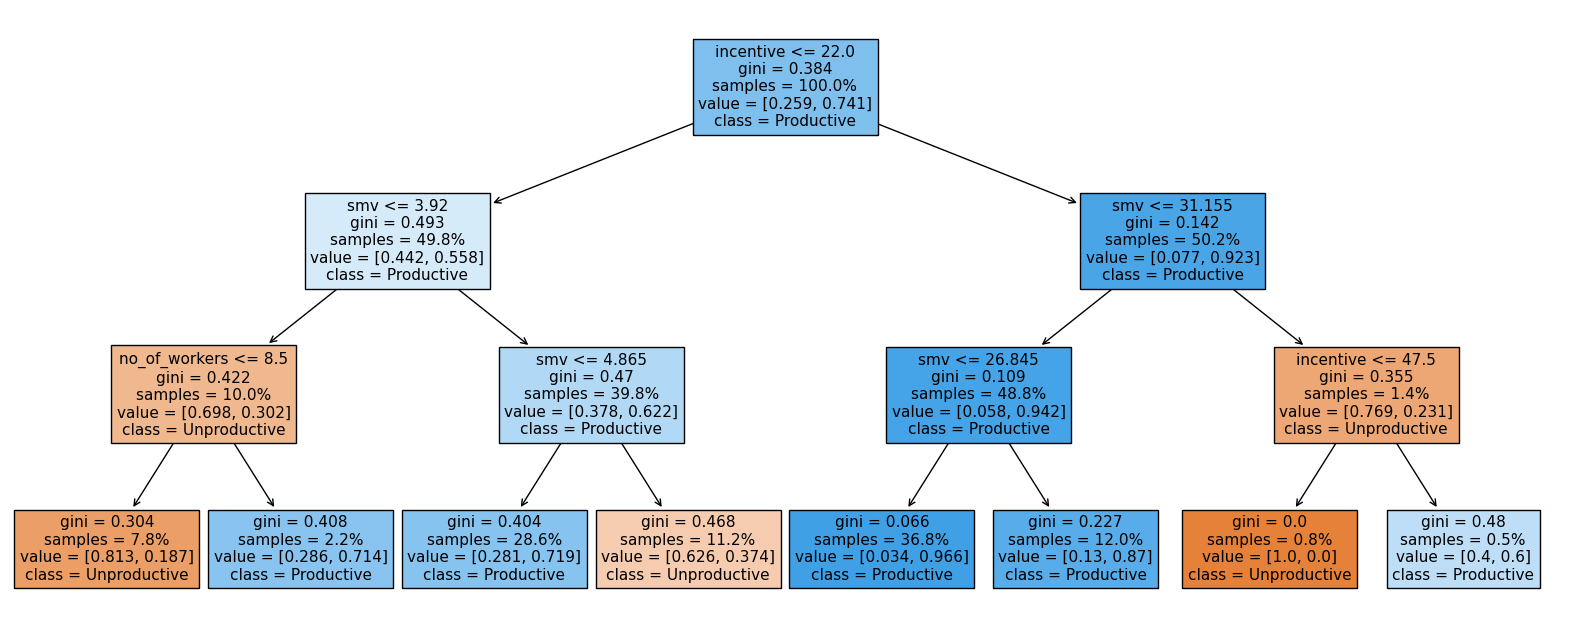

In [32]:
plt.figure(figsize = [20.0, 8.0])

_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

From above we can see that `smv` is the most significant column with 4 split, following by 2 times `incentive` and one `no_of_workers`. This is restricted under the three levels of maximum depth to avoiding overfitting.

### Evaluating the Tree

Now, we'll be calculating the metrics of the tree

In [33]:
from sklearn.metrics import confusion_matrix
y_pred = tree.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy :", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall   :", round(recall_score(y_test, y_pred), 2))
print("F1 Score :", round(f1_score(y_test, y_pred), 2))

Confusion Matrix:
 [[ 39  35]
 [ 14 152]]

Accuracy : 0.8
Precision: 0.81
Recall   : 0.92
F1 Score : 0.86


All the metrics are more than `0.80`, with the outstanding of `Recall`, scoring `0.92`, which is nice!

#### Cross Validation

Furthermore, we'll be doing the corss-validation which will split the dataset into several train and test subsets for scoring, so we dont end up with a special case with our manual run, and can have further comparison.

In [34]:
scores = cross_val_score(tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2))
print("Mean Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.82 0.86 0.82 0.84 0.85 0.8  0.72 0.74 0.82 0.77]
Mean Score: 0.8


In [35]:
multi_scores = cross_validate(tree, X, y, cv = 10,
                             scoring= ("precision", "recall", "f1") )

In [36]:
for index, key in list(multi_scores.items())[2:]:
    print(f'{index}: {key.round(2)}')
    print(f'  Mean: {key.mean().round(2)}')

test_precision: [0.82 0.87 0.83 0.82 0.84 0.84 0.78 0.83 0.84 0.85]
  Mean: 0.83
test_recall: [0.95 0.94 0.94 1.   0.99 0.9  0.85 0.82 0.94 0.84]
  Mean: 0.92
test_f1: [0.88 0.91 0.88 0.9  0.91 0.87 0.81 0.82 0.89 0.84]
  Mean: 0.87


The result is still impressive after few subsets' simulation! Thus, we'll not going to optimize the parameters for a better model or going through the pruning process.

## Explaining the Tree

The tree above illustrates which aspects of the factory are best at predicting if a team will be productive or not, and in our case, the "smv" has the greatest influence, followed by "incentive" and "number of workers". We can see these at the top of each boxes of the tree, and the "smv" appear most frequently.

How this works? Then we need to firstly look at the top of the box, it stated as "incentive <= 22". The number is a threshold which handle the split. Lets say we have a new observations with "incentive = 38", no matter what other values are, it's higher than 22 which mean a `False` for this box, and a `False` on a box means we need turn right, and we can see that there is another box at the below right side is waiting for us. Until now we have complated the first level, then we need to continue the same process on each box we reached until we dont see another 2 boxes is spliting our current box.

Once we reach the last box that we cant split anymore, we'll need to read the content of the box, at the bottom, there is a class equal to "Unproductive" or "Productive", then we can conclude on the observation. 

To summarize, the Decision Tree told us which variables have the strongest predictive power, and also allows us to make predictions using our selection or new observations

## Random Forest

Before we end the section, let's use the random forest algorithm to confirm whether the decision tree is already an optimal model, or we need to improve it's accuracy. This is also to avoid the overfitting the data with only a single tree.

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(oob_score=True, random_state=24)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [42]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy :", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall   :", round(recall_score(y_test, y_pred), 2))
print("F1 Score :", round(f1_score(y_test, y_pred), 2))

Confusion Matrix:
 [[ 37  37]
 [ 16 150]]

Accuracy : 0.78
Precision: 0.8
Recall   : 0.9
F1 Score : 0.85


Lets check also the Out of Bag Score, which directly estimate the model's performance, compared to the accuracy we calculated above.

In [39]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.83


Upon all the metrics above, we have a good result which is also similar to the decision tree we had make earlier, so it's not necessary to improve our decision tree.